# Introduction

gender : sex of students
race/ethnicity : ethnicity of students
parental level of education : parents' final education
lunch : having lunch before test (normal or abnormal)
test preparation course : complete or not complete before test

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [7]:
os.listdir(".")

['.config',
 'Music',
 '.condarc',
 '.DS_Store',
 'VirtualBox VMs',
 '.CFUserTextEncoding',
 '.xonshrc',
 'Untitled.ipynb',
 '.zshrc',
 'Creative Cloud Files',
 'Pictures',
 '.rnd',
 'students_exams_assignments.ipynb',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 '.bash_profile.pysave',
 '.bash_sessions',
 'Untitled.txt',
 'Public',
 '.idlerc',
 '.tcshrc',
 'exam_results.csv',
 '.anaconda',
 '.ssh',
 'Movies',
 'Applications',
 'opt',
 'SimUText 2019-2020',
 'reactors.csv',
 '.Trash',
 '.ipynb_checkpoints',
 '.jupyter',
 'Documents',
 '.bash_profile',
 'Downloads',
 '.continuum',
 '.gitconfig',
 '.bash_history',
 '.conda']

In [8]:
filename = "exam_results.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

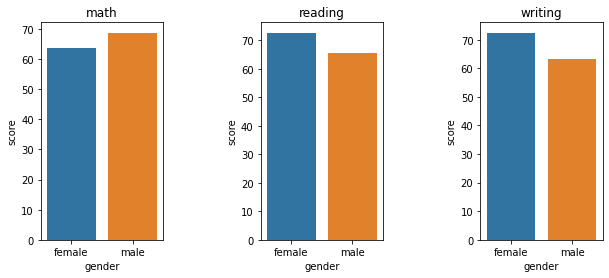

In [11]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = score_df.groupby("gender")[list(score_df.columns[-3:])[idx]].mean()
    sns.barplot(x=gender_df.index, y=gender_df.values)
    plt.ylabel("score")
    plt.title(list(score_df.columns[-3:])[idx])
    
plt.show()